In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as ss
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
df_draft = pd.read_csv('../data/clean_nfl_draft.csv')
df_draft.head()

,Player_Id,Year,Rnd,Pick,Tm,Player,Pos,Position Standard,First4AV,Age,...,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ,carrer_years
0,WinsJa00,2015,1.0,1,TAM,Jameis Winston,QB,QB,13,21.0,...,311.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,Florida St.,2.0
1,MariMa01,2015,1.0,2,TEN,Marcus Mariota,QB,QB,9,21.0,...,516.0,4.0,1.0,41.0,1.0,0.0,0.0,0.0,Oregon,2.0
2,FowlDa00,2015,1.0,3,JAX,Dante Fowler,OLB,LB,0,21.0,...,0.0,0.0,0.0,0.0,0.0,16.0,0.0,2.5,Florida,2.0
3,CoopAm00,2015,1.0,4,OAK,Amari Cooper,WR,WR,9,21.0,...,-3.0,0.0,134.0,1970.0,9.0,0.0,0.0,0.0,Alabama,2.0
4,ScheBr00,2015,1.0,5,WAS,Brandon Scherff,T,T,7,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Iowa,2.0


In [12]:
drop_labels = ['C', 'T', 'G', 'K', 'P']
for label in drop_labels:
    df_draft.drop(df_draft.index[df_draft['Position Standard'] == label], inplace = True)

In [15]:
idx_sk = list(df_draft.columns).index('Sk')
idx_cmp = list(df_draft.columns).index('Cmp')

In [16]:
labels_class = df_draft.columns[idx_cmp:idx_sk+1]

#### Train Test Split

In [17]:
X = df_draft[labels_class]
y = df_draft['Position Standard']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

## Decision Trees

In [19]:
dtree = DecisionTreeClassifier()

In [20]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Prediction and Evaluation

In [21]:
predictions = dtree.predict(X_test)

In [22]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

         DB       0.67      0.66      0.67       441
         DE       0.53      0.36      0.43       218
         DT       0.30      0.23      0.26       196
         FB       0.19      0.28      0.23        18
         LB       0.35      0.54      0.43       310
         QB       0.95      0.96      0.96       102
         RB       0.87      0.82      0.84       206
         TE       0.57      0.50      0.53       145
         WR       0.78      0.72      0.75       288

avg / total       0.61      0.59      0.59      1924



In [23]:
print(confusion_matrix(y_test,predictions))

[[292   1  13   1 127   2   0   1   4]
 [ 24  79  47   1  66   0   0   1   0]
 [ 29  53  45   1  67   0   1   0   0]
 [  0   0   0   5   3   0   7   0   3]
 [ 80  17  43   0 168   0   1   1   0]
 [  0   0   0   0   2  98   2   0   0]
 [  2   0   0  14  12   2 169   2   5]
 [  3   0   0   3  11   0   9  72  47]
 [  4   0   0   1  19   1   6  50 207]]


## Random Forests

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier(n_estimators=100)
rf_class.fit(X_train,y_train)

/home/gabrielperson/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
rf_class_predict = rf_class.predict(X_test)

In [26]:
print(classification_report(y_test,rf_class_predict))

             precision    recall  f1-score   support

         DB       0.73      0.69      0.71       441
         DE       0.54      0.35      0.42       218
         DT       0.33      0.27      0.29       196
         FB       0.40      0.22      0.29        18
         LB       0.38      0.60      0.47       310
         QB       0.99      0.96      0.98       102
         RB       0.90      0.87      0.88       206
         TE       0.59      0.47      0.52       145
         WR       0.75      0.77      0.76       288

avg / total       0.63      0.62      0.62      1924



In [27]:
print(confusion_matrix(y_test,rf_class_predict))

[[306   1  12   0 119   1   0   1   1]
 [ 20  76  49   1  71   0   0   1   0]
 [ 27  49  52   1  67   0   0   0   0]
 [  0   0   0   4   3   0   9   0   2]
 [ 62  16  44   0 186   0   1   1   0]
 [  0   0   0   0   2  98   2   0   0]
 [  1   0   0   3  12   0 179   0  11]
 [  2   0   0   1  10   0   6  68  58]
 [  1   0   0   0  19   0   2  45 221]]


## KNN - K Nearest Neigbhors

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
scaled_features = scaler.transform(X) 

In [31]:
df_feat = pd.DataFrame(scaled_features, columns=labels_class)
df_feat.head()

,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk
0,1.724437,1.768809,1.845881,1.823803,1.618230,0.112399,0.071345,0.682295,-0.339055,-0.310469,-0.279062,-0.456882,-0.325187,-0.320854
1,1.443272,1.377709,1.513708,1.823803,1.127289,0.085209,0.260608,0.300547,-0.330440,-0.282991,-0.177800,-0.456882,-0.325187,-0.320854
2,-0.127134,-0.130523,-0.126616,-0.117919,-0.135130,-0.221653,-0.215781,-0.208451,-0.339055,-0.310469,-0.279062,-0.335659,-0.325187,-0.129724
3,-0.127134,-0.130523,-0.126616,-0.117919,-0.135130,-0.210000,-0.218551,-0.208451,0.815283,1.009824,0.632299,-0.456882,-0.325187,-0.320854
4,-0.127134,-0.130523,-0.126616,-0.117919,-0.135130,-0.221653,-0.215781,-0.208451,-0.339055,-0.310469,-0.279062,-0.032602,-0.325187,0.367213


#### Train Test Split

In [37]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(scaled_features, y, test_size = 0.33)

In [38]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [40]:
knn.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [41]:
predicition_knn = knn.predict(X_test_knn)

#### Prediction and Evaluation

In [48]:
print("K = 1")
print('\n')
print(confusion_matrix(y_test_knn, predicition_knn))
print('\n')
print(classification_report(y_test_knn,predicition_knn))

K = 1


[[305  29  15   1 116   0   1   0   1]
 [ 10  82  41   1  46   0   0   0   0]
 [ 21  62  48   0  41   0   0   0   0]
 [  0   1   0   5   3   0   6   4   4]
 [ 78  54  40   0 158   0   0   0   1]
 [  0   0   0   0   5  87   1   1   0]
 [  1   1   0  11  20   2 196   7   7]
 [  0   0   1   0  13   0   1  67  44]
 [  6   3   2   4  25   0   4  57 184]]


             precision    recall  f1-score   support

         DB       0.72      0.65      0.69       468
         DE       0.35      0.46      0.40       180
         DT       0.33      0.28      0.30       172
         FB       0.23      0.22      0.22        23
         LB       0.37      0.48      0.42       331
         QB       0.98      0.93      0.95        94
         RB       0.94      0.80      0.86       245
         TE       0.49      0.53      0.51       126
         WR       0.76      0.65      0.70       285

avg / total       0.62      0.59      0.60      1924



#### Escolhendo o melhor K

In [45]:
error = []

for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_knn,y_train_knn)
    pred_i = knn.predict(X_test_knn)
    error.append(np.mean(pred_i != y_test_knn))

Text(0,0.5,'Taxa de Error')

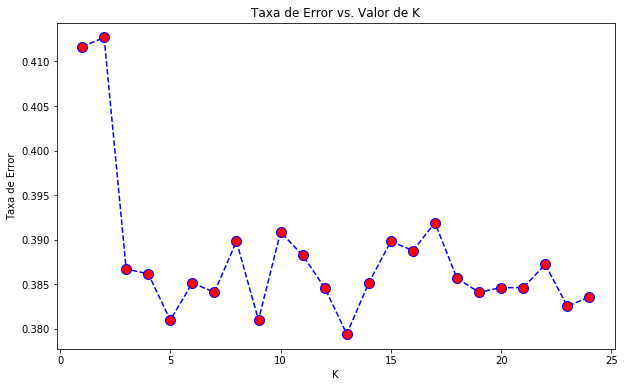

In [47]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Taxa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Taxa de Error')

In [51]:
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train_knn, y_train_knn)
predicition_knn_23 = knn.predict(X_test_knn)

print("K = 23")
print('\n')
print(confusion_matrix(y_test_knn, predicition_knn_23))
print('\n')
print(classification_report(y_test_knn,predicition_knn_23))

K = 23


[[424   6   7   0  29   0   2   0   0]
 [ 46  84  42   0   7   0   0   0   1]
 [ 46  60  49   0  17   0   0   0   0]
 [  6   0   0   1   0   0   6   5   5]
 [177  38  26   0  89   0   0   0   1]
 [  7   0   0   0   1  84   2   0   0]
 [ 25   0   0   0   2   0 201  11   6]
 [ 14   0   0   0   0   0   1  40  71]
 [ 34   0   0   0   1   0   3  25 222]]


             precision    recall  f1-score   support

         DB       0.54      0.91      0.68       468
         DE       0.45      0.47      0.46       180
         DT       0.40      0.28      0.33       172
         FB       1.00      0.04      0.08        23
         LB       0.61      0.27      0.37       331
         QB       1.00      0.89      0.94        94
         RB       0.93      0.82      0.87       245
         TE       0.49      0.32      0.39       126
         WR       0.73      0.78      0.75       285

avg / total       0.63      0.62      0.60      1924

